# OF-driven Gaussian denoising

In [1]:
!which python

/shared/PEs/OF3D/bin/python


In [2]:
#!pip install --upgrade pip

In [3]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from ipywidgets import *
import cv2
import time
#import kernels
#import _2D_OF_denoising2 as _2D_OF_denoising
import logging

In [4]:
!pip uninstall -y "image_denoising @ git+https://github.com/microscopy-processing/image_denoising"

Found existing installation: image_denoising 0.0.1
Uninstalling image_denoising-0.0.1:
  Successfully uninstalled image_denoising-0.0.1


In [5]:
# Run this cell if image_denoising is available as a package

!pip install "image_denoising @ git+https://github.com/microscopy-processing/image_denoising"
!pip show image_denoising
import image_denoising

  Cloning https://github.com/microscopy-processing/image_denoising to /tmp/pip-install-3oz78b5u/image-denoising_a2d0996d126541998512486fe919f76e
  Running command git clone --filter=blob:none --quiet https://github.com/microscopy-processing/image_denoising /tmp/pip-install-3oz78b5u/image-denoising_a2d0996d126541998512486fe919f76e
  Resolved https://github.com/microscopy-processing/image_denoising to commit a07ecef46840128f45dc7f68232daaabec195a36
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/vicente-gonzalez-ruiz/motion_estimation (to revision main) to /tmp/pip-install-3oz78b5u/motion-estimation_df8f5e4a6e52400387c1e5d696e40a82
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/motion_estimation /tmp/pip-install-3oz78b5u/motion-estimation_df8f5e4a6e52400387c1e5d696e40a82
  Resolved h

In [6]:
try:
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image
except:
    !pip install "image_IO @ git+https://github.com/vicente-gonzalez-ruiz/image_IO"
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image

In [7]:
!rm barb.png.?
!wget http://www.hpca.ual.es/~vruiz/images/barb.png

--2024-03-06 16:11:18--  http://www.hpca.ual.es/~vruiz/images/barb.png
Resolving www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Connecting to www.hpca.ual.es (www.hpca.ual.es)|150.214.150.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 232140 (227K) [image/png]
Saving to: ‘barb.png.1’

barb.png.1          100%[===================>] 226,70K  --.-KB/s    in 0,1s    

2024-03-06 16:11:18 (1,58 MB/s) - ‘barb.png.1’ saved [232140/232140]



In [8]:
img = gray_image.read("barb.png")

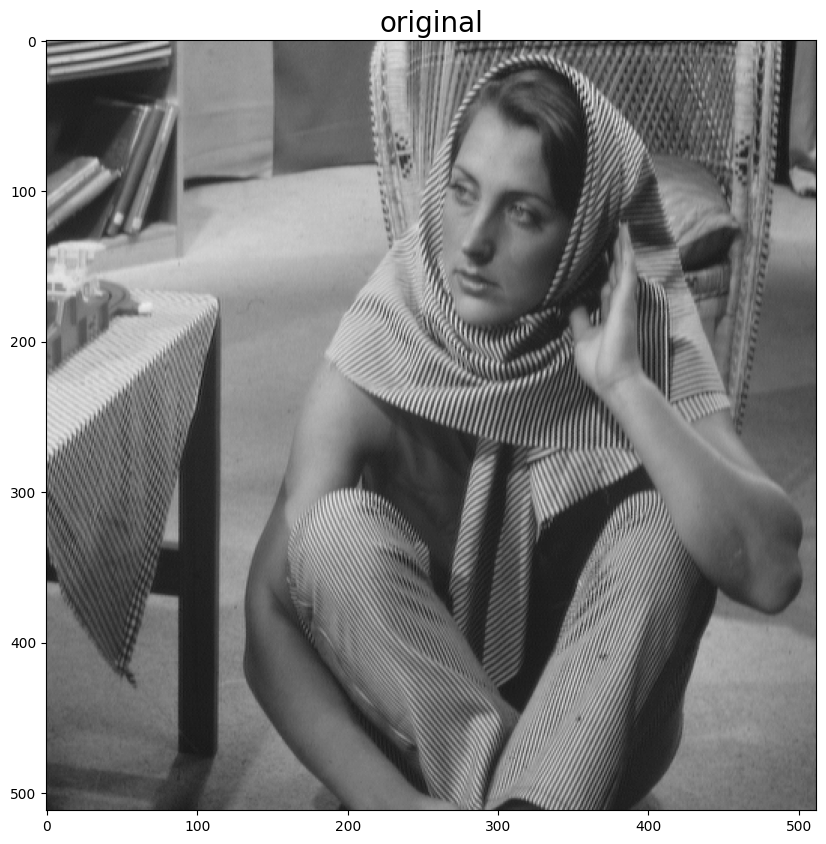

In [9]:
gray_image.show(img, "original")

In [10]:
mean = 0
var = 200
sigma = var**0.5
noise = np.random.normal(mean,sigma,img.shape).reshape(img.shape)
noisy_img = np.clip((img + noise), 0, 255).astype(np.uint8)

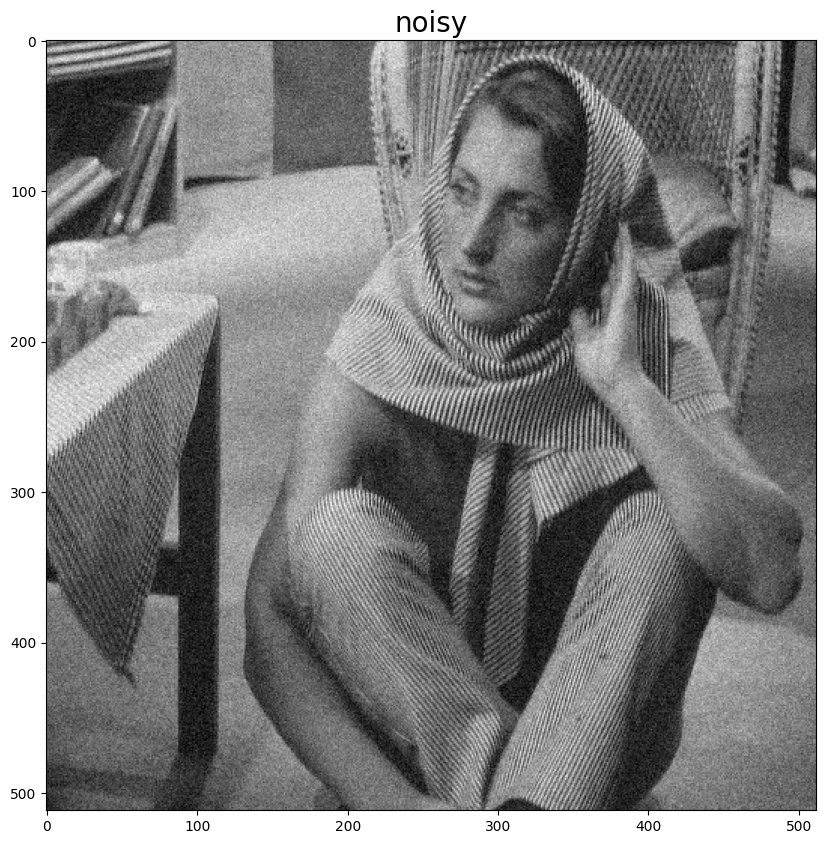

In [11]:
gray_image.show(noisy_img, "noisy")

## Gaussian

In [12]:
import image_denoising
from image_denoising import gaussian
image_denoising.gaussian.logger.setLevel(logging.WARNING)
logging.getLevelName(image_denoising.gaussian.logger.getEffectiveLevel())

'WARNING'

In [13]:
%%time

GD__N_iters = 1
GD__sigma = 2.5

denoised, _ = image_denoising.gaussian.filter_gray_image(noisy_img, GD__sigma, GD__N_iters)


CPU times: user 137 ms, sys: 0 ns, total: 137 ms
Wall time: 137 ms


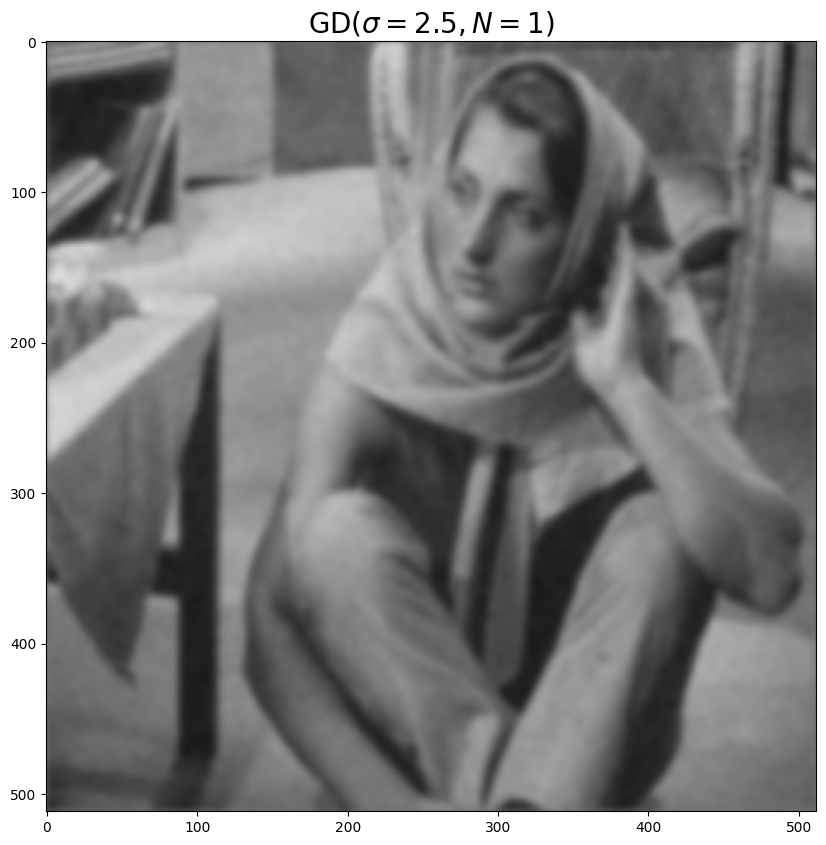

In [14]:
gray_image.show(denoised, "GD" + "($\sigma=" + f"{GD__sigma}, N={GD__N_iters}$)")

## OF-driven Gaussian

In [15]:
import image_denoising
from image_denoising import OF_gaussian
image_denoising.OF_gaussian.logger.setLevel(logging.WARNING)
logging.getLevelName(image_denoising.OF_gaussian.logger.getEffectiveLevel())

'WARNING'

In [16]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 1
OFGD__w = 9
OFGD__sigma_OF = 1.0

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

v3
0 14.894323 10.355391 4.8721194 6.670018 11.284278 13.408833 11.379746 19.269947 15.539777 8.999553 1.6266551 9.25254 11.561238 11.738953 22.846214 16.245481 11.180238 4.707347 7.1499424 11.725498 14.500249 1 16.534813 9.810093 6.9127665 8.676637 13.19122 12.582559 37.843136 17.94838 12.612113 7.054017 1.929827 5.8436074 11.231065 13.422049 19.060389 13.033596 11.276026 7.602576 5.3747454 11.824243 14.463061 2 15.973929 10.264938 5.8137336 10.961178 13.777724 14.832818 20.580593 16.761509 14.9781 9.560721 2.117044 7.583488 11.416438 13.387618 19.445143 14.197501 9.045835 5.679127 9.584536 12.460752 15.821331 3 14.392648 10.121843 8.611111 10.097423 13.100887 16.020487 17.964336 19.140482 14.108298 8.400867 2.6271667 7.0158215 13.0483265 10.816813 20.049246 14.870274 9.639189 5.3603663 8.105491 11.654107 14.706078 4 15.490012 10.945302 9.001246 9.368993 15.387207 16.44063 25.59007 15.01407 14.187324 8.422436 5.835553 8.81536 14.372996 16.769472 16.826176 15.4775715 9.645246 6.0246854

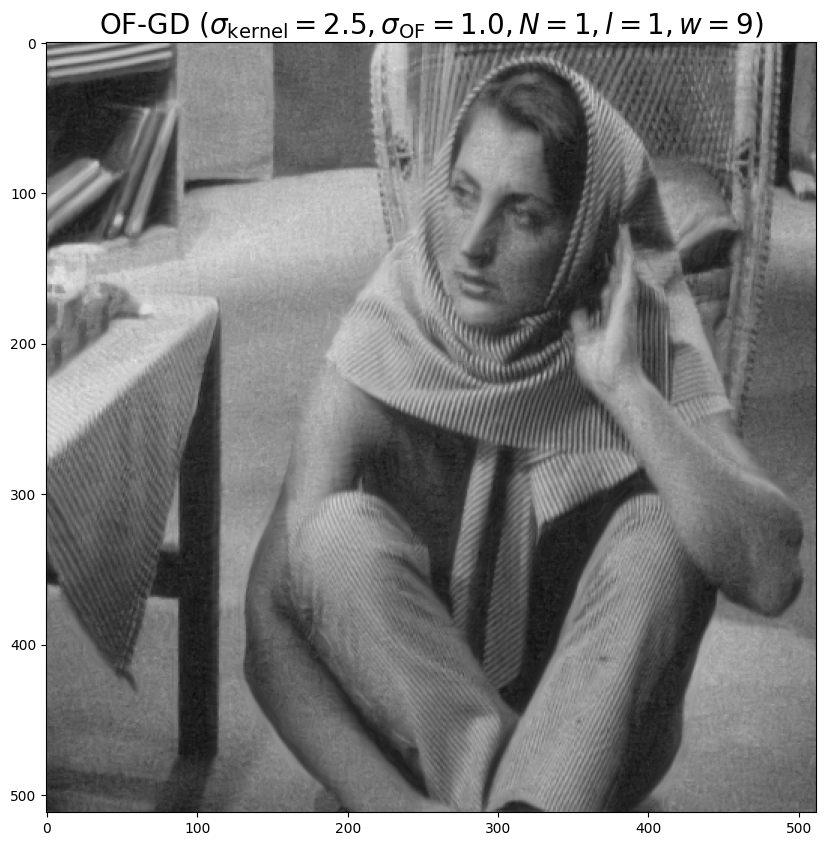

In [17]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [18]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 1
OFGD__w = 11
OFGD__sigma_OF = 1.0

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

v3
0 7.5691023 7.285282 6.839676 7.0292587 7.499518 11.331709 10.969838 5.6468024 4.1437073 1.3858248 0.30296108 1.5440402 2.3049817 6.022763 22.195284 9.094757 7.7234564 6.3540387 6.753368 7.06331 7.188394 1 7.987763 5.6187453 5.467508 6.3165174 7.4580536 10.573209 12.292479 6.250668 2.7741032 1.7180028 0.2865152 1.474594 3.3950388 6.246728 14.35281 9.221201 8.314056 6.9603944 6.7772675 6.981283 7.1524606 2 5.557145 4.3135676 4.553717 5.2534337 5.863029 14.842274 15.3550205 5.1058235 3.0876155 1.7913489 0.42529172 1.230614 3.2158725 7.965965 21.896261 7.2114086 7.066513 4.861611 4.7024374 4.792824 5.8584356 3 6.876738 5.0541744 5.024849 5.0497766 8.47666 10.917312 13.366838 7.682306 3.3011165 1.6632061 0.5955997 1.2031064 3.0354447 8.741785 10.322387 6.167893 5.8822885 4.758345 4.717884 4.467868 6.047455 4 8.0283785 5.7240415 4.824643 5.625634 7.088668 11.6219015 14.12805 7.1890254 3.3729508 1.9691015 0.30205652 1.5070447 3.7454128 9.166545 9.74531 6.690556 5.6851115 5.1687584 5.64818

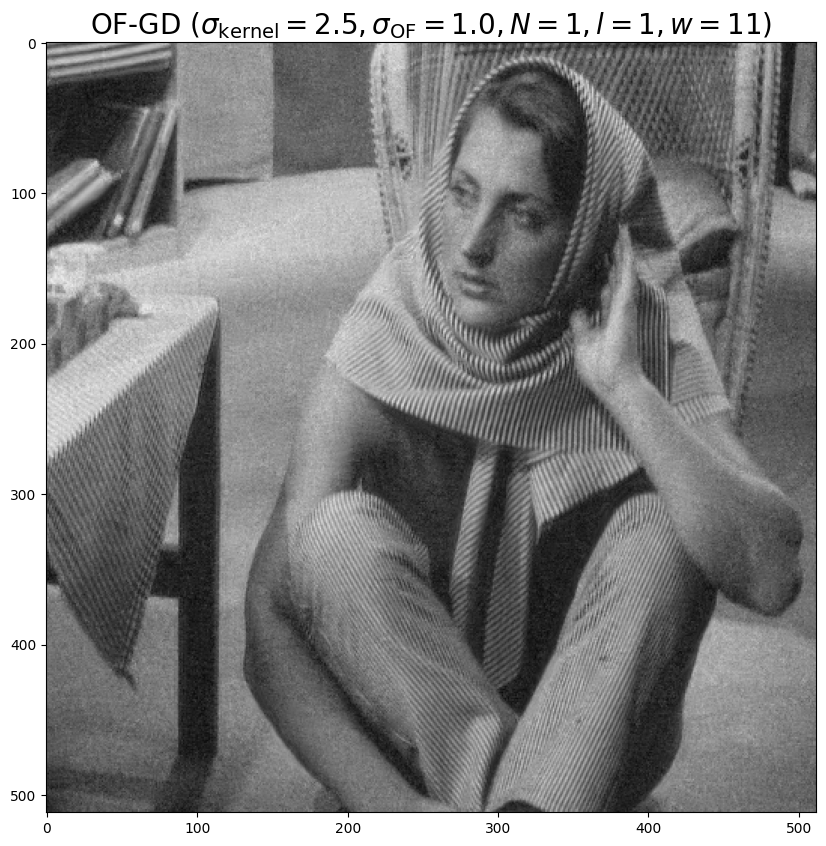

In [19]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [20]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 1
OFGD__w = 11
OFGD__sigma_OF = 0.5

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

v3
0 5.222747 4.8646703 5.0461216 4.8537397 5.4251842 6.0192585 7.8702064 3.701953 2.2949805 1.1144695 0.17862855 1.075595 2.2299483 3.7287767 13.7143135 6.645165 4.167401 4.5818605 4.914435 4.437757 5.1088257 1 4.58513 3.2774935 3.8217206 3.8740194 4.2261944 8.870895 6.6836724 5.076269 2.2508664 1.1225013 0.122209564 1.0558815 2.2870903 3.682354 8.703874 4.420332 4.366428 4.4549427 4.3713646 4.1233335 4.4212995 2 3.5022287 2.5567954 2.823439 3.4703321 3.7263973 6.415949 5.5982723 3.8438795 2.3190155 1.0691745 0.087217726 1.0814182 2.4952986 3.3892047 4.0901914 4.2085395 3.3352418 3.4497728 3.3474092 2.9640806 3.4729202 3 3.9937742 2.9938312 3.9674604 3.2920992 4.94961 6.6774664 5.83432 5.350498 2.5140555 1.1214556 0.16308166 1.0615599 2.269044 3.997911 7.1619 4.5946207 4.2074904 3.1752317 3.1514893 3.3652418 3.3607225 4 4.3968782 3.4966633 3.088365 3.5755827 3.7370467 6.8193965 7.9982414 5.585522 2.3026352 1.0875407 0.12289348 1.1700976 2.8536081 4.1629043 6.480849 3.4416978 3.0615544

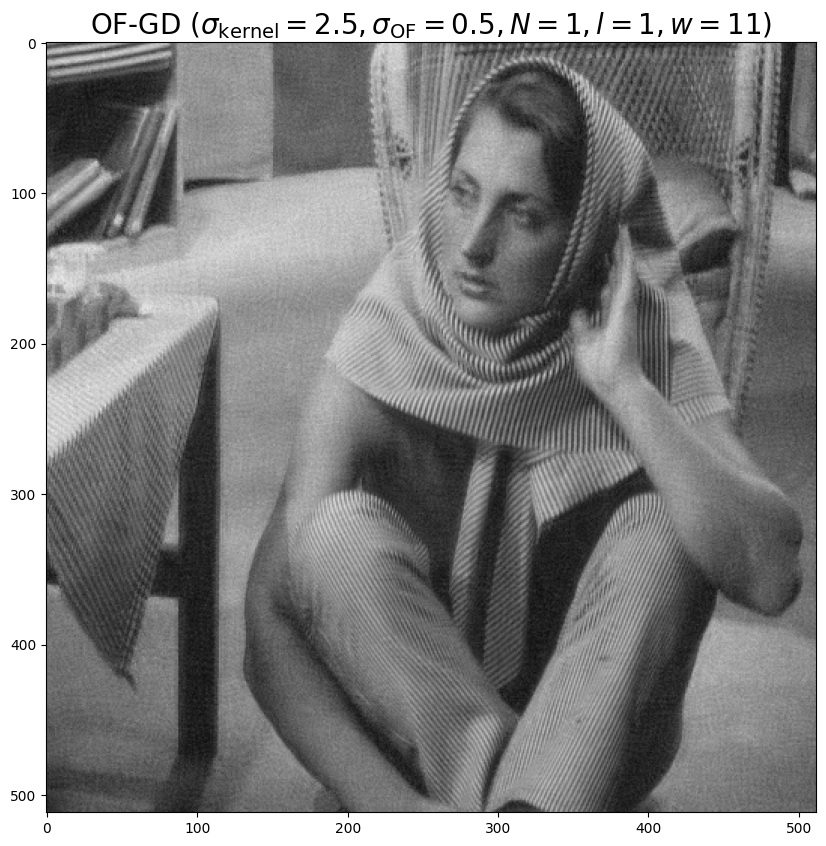

In [21]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [22]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 1
OFGD__w = 17
OFGD__sigma_OF = 1.0

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

v3
0 13.8587 13.485365 9.992777 10.794079 11.328931 15.495003 14.98675 13.967884 2.1223595 1.0563451 0.11353377 1.0331087 2.054722 15.883832 12.973301 6.415847 10.588637 11.4036 10.385192 14.4443445 13.476396 1 12.458772 15.685723 8.445584 10.252603 12.834083 16.56965 16.881832 12.623581 2.1410959 1.0477363 0.19534312 1.0244929 2.0432386 12.805241 8.540289 10.104949 11.873916 11.849581 11.389545 9.361859 16.21066 2 5.5680203 17.077042 12.620642 10.2543745 10.817646 11.391555 14.006249 12.153528 2.0710826 1.0527171 0.13606556 1.0279598 2.0842664 3.2371085 7.791643 11.069041 10.567355 10.256948 10.997383 8.094717 5.9969506 3 4.9801826 8.333892 16.24001 11.58152 9.993956 10.485083 12.811964 14.6533785 2.1181061 1.0529975 0.2463127 1.0318594 2.0645857 4.7039986 6.8787556 8.753629 8.716706 9.489435 9.266036 6.670225 4.135649 4 6.199449 6.1063876 14.576022 14.270077 12.871891 12.6886015 13.724456 14.744651 2.1051352 1.065758 0.16861485 1.0383865 2.1397688 6.280099 7.5805516 8.851213 9.792737

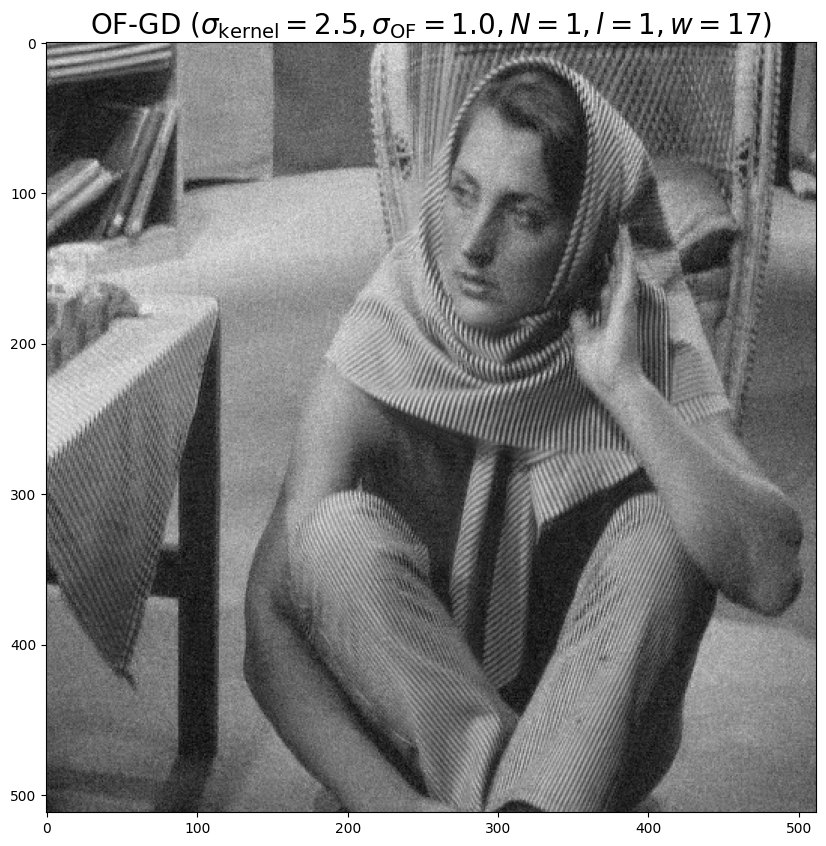

In [23]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [24]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 3
OFGD__l = 1
OFGD__w = 9
OFGD__sigma_OF = 2.5

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

v3
0 22.442347 16.163904 15.4443035 17.875734 17.872448 23.394068 30.504835 22.537876 17.494064 10.756285 8.979611 17.533865 14.425756 22.277718 31.633615 20.287546 14.9391985 13.619441 17.343412 19.743027 25.25397 1 17.74801 13.989458 13.820102 13.638954 19.28522 25.404099 33.67061 26.082718 18.614985 10.13564 6.0142207 8.043102 20.63672 21.836721 26.045418 19.501194 15.098289 14.582452 21.523077 25.267448 25.06991 2 20.9624 20.652637 20.535597 22.027666 23.409224 23.075813 48.774166 19.36064 15.263072 11.747276 6.3453374 16.222507 21.77757 24.293905 47.84023 18.564903 20.152018 20.938715 22.163826 21.920782 21.952688 3 24.957214 23.886198 24.54398 25.871647 26.47779 24.766262 56.004032 27.927294 15.046329 12.444536 14.285451 22.163414 22.992317 20.09759 30.446896 23.51117 23.429964 23.955462 25.789116 25.752743 20.220667 4 35.334595 35.510983 37.609222 37.42 35.22699 30.809067 58.503273 21.027128 17.654118 14.308459 13.386925 28.798222 31.179129 28.377192 42.268795 34.23769 33.496094

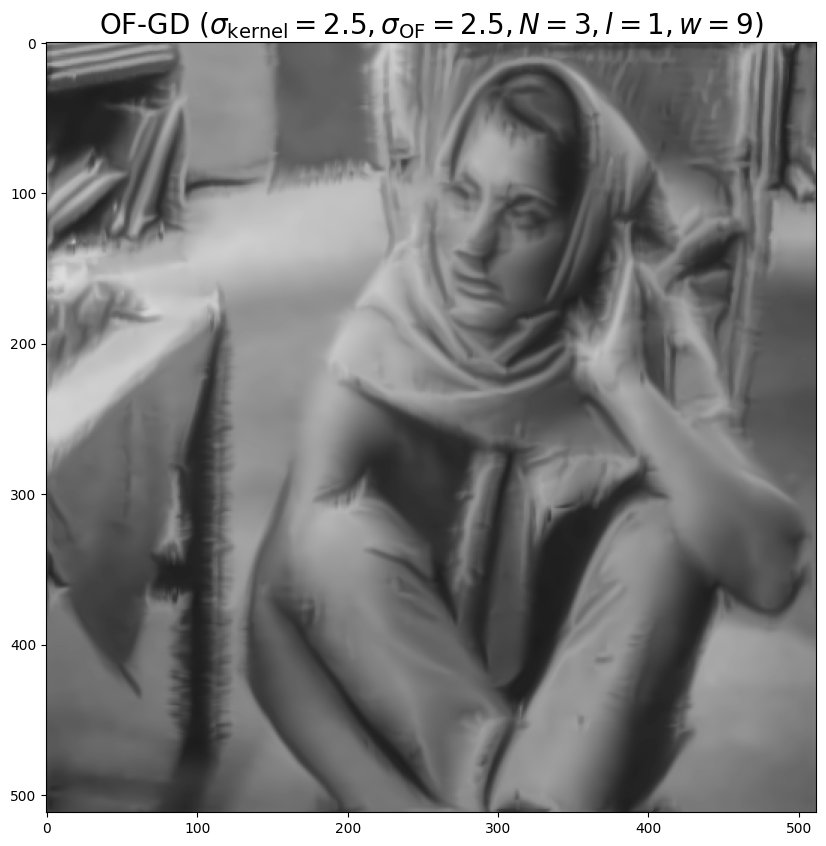

In [25]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [26]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 9
OFGD__sigma_OF = 2.5

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

v3
0 22.442347 16.163904 15.4443035 17.875734 17.872448 23.394068 30.504835 22.537876 17.494064 10.756285 8.979611 17.533865 14.425756 22.277718 31.633615 20.287546 14.9391985 13.619441 17.343412 19.743027 25.25397 1 17.74801 13.989458 13.820102 13.638954 19.28522 25.404099 33.67061 26.082718 18.614985 10.13564 6.0142207 8.043102 20.63672 21.836721 26.045418 19.501194 15.098289 14.582452 21.523077 25.267448 25.06991 2 20.9624 20.652637 20.535597 22.027666 23.409224 23.075813 48.774166 19.36064 15.263072 11.747276 6.3453374 16.222507 21.77757 24.293905 47.84023 18.564903 20.152018 20.938715 22.163826 21.920782 21.952688 3 24.957214 23.886198 24.54398 25.871647 26.47779 24.766262 56.004032 27.927294 15.046329 12.444536 14.285451 22.163414 22.992317 20.09759 30.446896 23.51117 23.429964 23.955462 25.789116 25.752743 20.220667 4 35.334595 35.510983 37.609222 37.42 35.22699 30.809067 58.503273 21.027128 17.654118 14.308459 13.386925 28.798222 31.179129 28.377192 42.268795 34.23769 33.496094

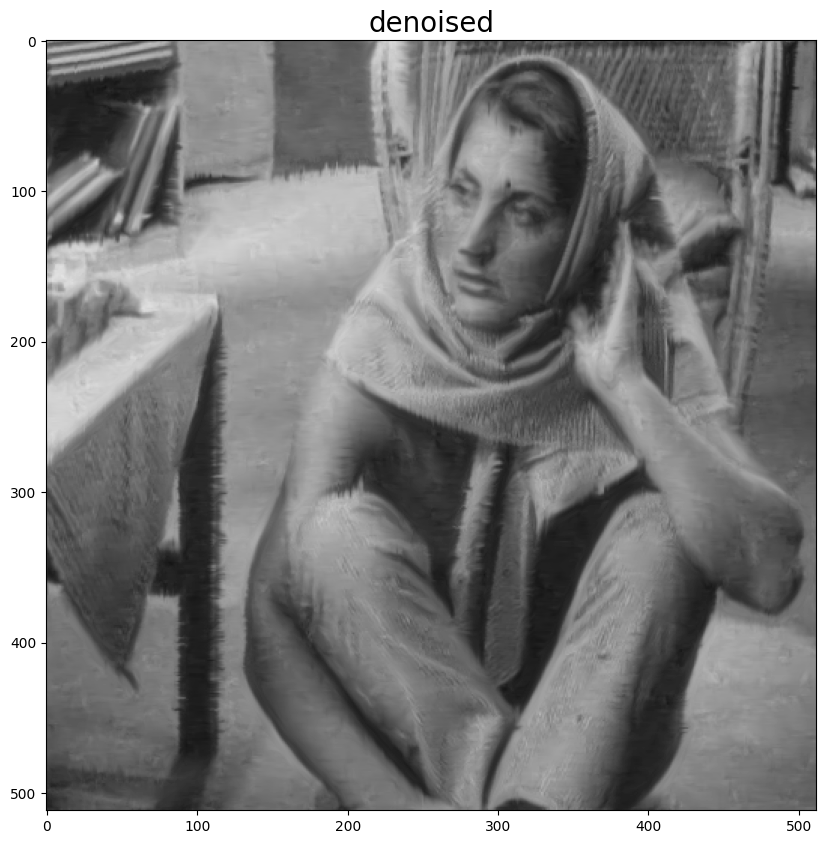

In [27]:
gray_image.show(denoised, "denoised")

In [28]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 33
OFGD__sigma_OF = 2.5

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

v3
0 15.534822 10.895661 14.688106 20.27928 23.293978 7.619637 4.585979 3.4868174 2.2353394 1.0542799 0.26995704 1.090665 2.1065838 3.1847775 4.1638966 11.969455 17.3308 15.231623 13.18508 11.562127 9.098106 1 15.574384 9.728671 14.225241 20.862762 24.492777 6.100001 4.851432 3.4651446 2.1184552 1.0647506 0.34334165 1.089087 2.0256553 3.1286573 4.2351623 12.264432 16.592783 14.942996 12.868236 11.358354 9.003934 2 12.252148 9.717906 13.394937 20.361744 24.779982 6.159157 4.7473197 3.2545378 2.067524 1.0144621 0.36801744 1.100019 2.0432203 3.2195053 4.4655633 12.775881 15.609545 13.942525 11.899073 9.729518 10.265269 3 9.548638 9.725558 14.172307 19.429976 23.974718 6.4641256 4.4226255 3.2385883 2.0389225 1.0038059 0.30675697 1.0163581 2.0954213 3.3773873 4.4370346 13.199067 14.609405 12.501775 8.87085 9.591151 8.990838 4 8.226206 9.734456 15.087038 19.598883 24.669445 8.298634 4.299537 3.1148438 2.0157428 1.0067399 0.17217337 1.0386773 2.1454134 3.248538 4.371427 13.142345 11.67264 9.1

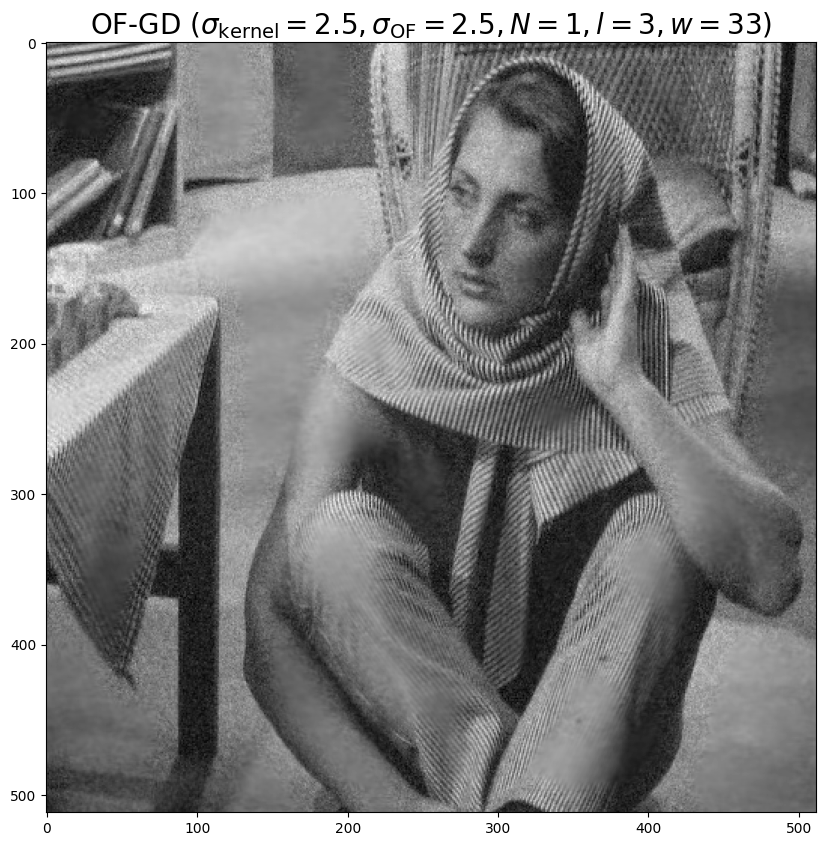

In [29]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [30]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 33
OFGD__sigma_OF = 0.5

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

v3
0 2.581185 2.3728416 2.1135468 2.7381377 2.5250175 3.16716 4.319386 3.0583723 2.02667 1.0105639 0.019431988 1.0183421 2.0287833 3.0689223 3.8982964 2.4751894 2.263972 2.225817 2.1962385 2.6915684 3.2058816 1 2.630017 2.5826023 1.9640206 2.5599508 2.287477 3.0368407 4.1318393 3.0569475 2.0282993 1.0126181 0.021897666 1.0123217 2.0241096 3.062651 3.8693953 2.4718988 2.265998 2.2910988 2.175469 2.672706 3.1871612 2 2.9328249 2.847119 1.8938498 2.412458 2.2201436 2.8682768 3.9660246 3.0649848 2.0259757 1.0126834 0.0149513725 1.0127462 2.0218682 3.0661685 3.7880933 2.4622004 2.2900002 2.3587127 2.249708 2.6594493 3.1292193 3 3.236635 2.8654864 1.8940911 2.2966568 2.1853368 2.6906025 3.8535228 3.0785906 2.0214326 1.0112604 0.019249901 1.0115898 2.0187736 3.080291 3.710727 2.4419303 2.322774 2.3686192 2.3488219 2.6512754 3.0233612 4 3.650693 2.8665993 1.8426429 2.2214074 2.1546056 2.5418804 3.8869278 3.068685 2.0266306 1.0100131 0.021161024 1.0131102 2.0235572 3.1222532 3.6267505 2.4282837

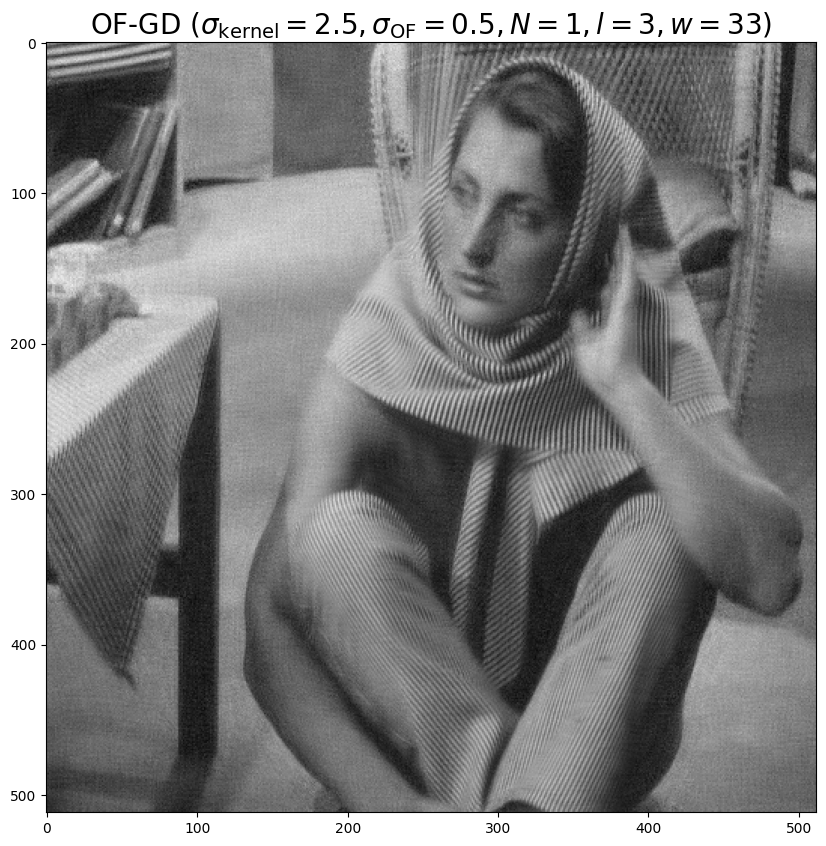

In [31]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 33
OFGD__sigma_OF = 0.25

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 17
OFGD__sigma_OF = 0.25

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 0.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 17
OFGD__sigma_OF = 0.25

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 0.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 17
OFGD__sigma_OF = 2.5

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 0.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 7
OFGD__sigma_OF = 2.5

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

In [ ]:
%%time

OFGD__sigma_kernel = 3.5
OFGD__N_iters = 1
OFGD__l = 3
OFGD__w = 15
OFGD__sigma_OF = 2.5

denoised, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-GD " + "($\sigma_\mathrm{kernel}=" + f"{OFGD__sigma_kernel}"  + ", \sigma_\mathrm{OF}=" + f"{OFGD__sigma_OF}" + f", N={OFGD__N_iters}, l={OFGD__l}, w={OFGD__w}$)")

## OF-driven Random

In [ ]:
import image_denoising
from image_denoising import OF_random
image_denoising.OF_random.logger.setLevel(logging.WARNING)
logging.getLevelName(image_denoising.OF_random.logger.getEffectiveLevel())

In [ ]:
%%time

OFRD__N_iters = 50
OFRD__sigma_random = 1.0
OFRD__l = 3
OFRD__w = 11
OFRD__sigma_OF = 0.25

denoised, _ = image_denoising.OF_random.filter(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    N_iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [ ]:
%%time

OFRD__N_iters = 50
OFRD__sigma_random = 1.0
OFRD__l = 3
OFRD__w = 11
OFRD__sigma_OF = 1.25

denoised, _ = image_denoising.OF_random.filter(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    N_iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [ ]:
%%time

OFRD__N_iters = 50
OFRD__sigma_random = 0.5
OFRD__l = 3
OFRD__w = 11
OFRD__sigma_OF = 0.25

denoised, _ = image_denoising.OF_random.filter(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    N_iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [ ]:
%%time

OFRD__N_iters = 100
OFRD__sigma_random = 0.5
OFRD__l = 3
OFRD__w = 11
OFRD__sigma_OF = 0.25

denoised, _ = image_denoising.OF_random.filter(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    N_iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [ ]:
%%time

OFRD__N_iters = 50
OFRD__sigma_random = 1.0
OFRD__l = 3
OFRD__w = 3
OFRD__sigma_OF = 0.25

denoised, _ = image_denoising.OF_random.filter(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    N_iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [ ]:
%%time

OFRD__N_iters = 50
OFRD__sigma_random = 0.5
OFRD__l = 1
OFRD__w = 3
OFRD__sigma_OF = 0.25

denoised, _ = image_denoising.OF_random.filter(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    N_iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [ ]:
%%time

OFRD__N_iters = 50
OFRD__sigma_random = 0.5
OFRD__l = 1
OFRD__w = 5
OFRD__sigma_OF = 0.25

denoised, _ = image_denoising.OF_random.filter(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    N_iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [ ]:
%%time

OFRD__N_iters = 50
OFRD__sigma_random = 0.5
OFRD__l = 1
OFRD__w = 17
OFRD__sigma_OF = 0.25

denoised, _ = image_denoising.OF_random.filter(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    N_iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [ ]:
%%time

OFRD__N_iters = 100
OFRD__sigma_random = 0.5
OFRD__l = 1
OFRD__w = 17
OFRD__sigma_OF = 0.25

denoised, _ = image_denoising.OF_random.filter(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    N_iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [ ]:
%%time

OFRD__N_iters = 100
OFRD__sigma_random = 0.5
OFRD__l = 1
OFRD__w = 17
OFRD__sigma_OF = 0.75

denoised, _ = image_denoising.OF_random.filter(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    N_iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [ ]:
%%time

OFRD__N_iters = 100
OFRD__sigma_random = 0.5
OFRD__l = 1
OFRD__w = 17
OFRD__sigma_OF = 0.75

denoised, _ = image_denoising.OF_random.filter(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    N_iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [ ]:
%%time

OFRD__N_iters = 100
OFRD__sigma_random = 0.5
OFRD__l = 1
OFRD__w = 7
OFRD__sigma_OF = 0.75

denoised, _ = image_denoising.OF_random.filter(
    image_denoising.OF_random.warp_B_to_A,
    noisy_img,
    N_iters=OFRD__N_iters,
    sigma_RD=OFRD__sigma_random,
    l=OFRD__l,
    w=OFRD__w,
    sigma_OF=OFRD__sigma_OF)

In [ ]:
gray_image.show(denoised, "OF-RD " + "($\sigma_\mathrm{OF}=" + f"{OFRD__sigma_OF}, " + "\sigma_\mathrm{random}=" + f"{OFRD__sigma_random}, " + f"N={OFRD__N_iters}, l={OFRD__l}, w={OFRD__w}$)")

In [ ]:
input()

## Old stuff

In [ ]:
denoised_img = _2D_OF_denoising.filter(noisy_img, kernel, l=1, w=33)

In [ ]:
gray_image.show(denoised_img, "denoised")

In [ ]:
print(f"time: {time.process_time()} seconds")

In [ ]:
!pip install mrcfile
import mrcfile

In [ ]:
input_format = "rec"
tomogram_name = "/home/vruiz/Descargas/TS01-wbp"
tomogram_MRC = mrcfile.open(f'{tomogram_name}.{input_format}')
print(f"tomogram_name={tomogram_name} type={tomogram_MRC.data.dtype} shape={tomogram_MRC.data.shape}")
tomogram = tomogram_MRC.data

In [ ]:
denoised_tomogram = _2D_OF_denoising.filter_over_Y(tomogram, kernel, l=2, w=3)

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import *
import cv2

In [ ]:
def g(z=0):
  #cv2_imshow(cv2.normalize(tomogram[z, :, :][0:200,0:200].astype(np.uint8), None, 0, 255, cv2.NORM_MINMAX))
  #cv2_imshow(cv2.normalize(tomogram[z, :, :].astype(np.uint8), None, 0, 255, cv2.NORM_MINMAX))
  plt.imshow(cv2.normalize(tomogram[z, :, :], None, 0, 255, cv2.NORM_MINMAX))
  plt.imshow(cv2.normalize(denoised_tomogram[z, :, :], None, 0, 255, cv2.NORM_MINMAX))

interactive_plot = interactive(g, z=100)
interactive_plot

In [ ]:
fake_tomogram = np.stack([np.roll(noisy_img,0) for i in range(64)])

In [ ]:
def g(z=0):
  plt.imshow(cv2.normalize(fake_tomogram[:, z, :], None, 0, 255, cv2.NORM_MINMAX))

interactive_plot = interactive(g, z=10)
interactive_plot

In [ ]:
fake_denoised_tomogram = _2D_OF_denoising.filter_over_X(fake_tomogram, kernel, l=2, w=3)

In [ ]:
try:
    import optical_flow as motion
    import display
    import prediction
except:
    !pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"
    from motion_estimation import optical_flow as motion
    from motion_estimation import display
    from motion_estimation import prediction

In [ ]:
initial_MVs = np.zeros((fake_tomogram[:, 0, :].shape[0], fake_tomogram[:, 0, :].shape[1], 2), dtype=np.float32)
MVs = motion.Farneback_ME(predicted=fake_tomogram[:, 10, :], reference=fake_tomogram[:, 15, :], initial_MVs=initial_MVs)

In [ ]:
#display.show_vectors(MVs[::1, ::1])
display.show_vectors(MVs)

In [ ]:
np.max(MVs)

In [ ]:
MVs[32,...]

In [ ]:
initial_MVs = np.zeros((tomogram[:, 0, :].shape[0], tomogram[:, 0, :].shape[1], 2), dtype=np.float32)
MVs = motion.Farneback_ME(predicted=tomogram[:, 1, :], reference=tomogram[:, 2, :], initial_MVs=initial_MVs)

In [ ]:
np.max(MVs)

In [ ]:
tomogram.dtype

In [ ]:
fake_tomogram.dtype

In [ ]:
RGB_image.show(display.colorize(MVs))